In [1]:
# Global variables
# '/Users/sarah/Documents/images/training' testing
# '/Users/sarah/Documents/RC/Rock Classifier 2/train'
# '/Users/sarah/Google Drive/Rock Classifier/train'
TRAIN_DIR = '/Users/sarah/Documents/RC/Rock Classifier 4/validate'
TEST_DIR = '/Users/sarah/Documents/RC/Rock Classifier 4/train'

IMAGE_SIZE = (100, 100)
BATCH_SIZE = 45

NUM_POINTS = 24
RADIUS = 8

In [2]:
# Libraries
import tensorflow as tf

In [3]:
# Data generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

train_datagen = ImageDataGenerator(rescale = 1. / 255, shear_range = 0.3, zoom_range = 0.3, horizontal_flip = True) 
test_datagen = ImageDataGenerator(rescale = 1. / 255) 

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR, 
    target_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
    class_mode ='categorical',
    shuffle=True)
  
validation_generator = test_datagen.flow_from_directory(
    TEST_DIR, 
    target_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
    shuffle=False)

class_labels = list(validation_generator.class_indices.keys()) 

Found 45 images belonging to 4 classes.
Found 36 images belonging to 4 classes.


In [4]:
x_tr, y_tr = train_generator[0]
x_tst, y_tst = validation_generator[0]

y_1D = []
for label in y_tr:
    sum = 0
    for i in range(len(label)):
        sum += label[i]*i
    y_1D.append(sum)
y_tr = y_1D

y_1D = []
for label in y_tst:
    sum = 0
    for i in range(len(label)):
        sum += label[i]*i
    y_1D.append(sum)
y_tst = y_1D

In [ ]:
# Load data

In [5]:
import numpy as np
print(np.shape(x_tr), np.shape(x_tst))

(45, 100, 100, 3) (36, 100, 100, 3)


In [11]:
# Feature extraction
from skimage import feature
import cv2

data_extracted_tr = []
for img in x_tr:
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #hist = feature.local_binary_pattern(gray, NUM_POINTS, RADIUS, method="uniform")
    #data_extracted_tr.append(hist)
    b,g,r = cv2.split(img)
    b = feature.local_binary_pattern(b, NUM_POINTS, RADIUS, method="uniform")
    g = feature.local_binary_pattern(g, NUM_POINTS, RADIUS, method="uniform")
    r = feature.local_binary_pattern(r, NUM_POINTS, RADIUS, method="uniform")
    data_extracted_tr.append([b, g, r])

data_extracted_tst = []
for img in x_tst:
    b,g,r = cv2.split(img)
    b = feature.local_binary_pattern(b, NUM_POINTS, RADIUS, method="uniform")
    g = feature.local_binary_pattern(g, NUM_POINTS, RADIUS, method="uniform")
    r = feature.local_binary_pattern(r, NUM_POINTS, RADIUS, method="uniform")
    data_extracted_tst.append([b, g, r])
    
np.shape(data_extracted_tst)

(36, 3, 100, 100)

Extracción de contorno con HOG


TypeError: Invalid shape (3, 100, 100) for image data

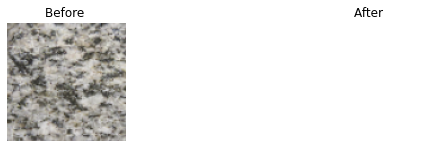

In [7]:
# Plot extracted image data
import matplotlib.pyplot as plt

print('Extracción de contorno con HOG')

fig = plt.figure(figsize=(10,10))
for i in range(4):
    ax = fig.add_subplot(4,2,i*2+1)
    ax.set_title('Before ')#+y[i*4])
    ax.set_axis_off()
    ax.imshow(x_tr[i*4])
    ax2 = fig.add_subplot(4,2,i*2+2)
    ax2.set_title('After ')#+y[i*4])
    ax2.set_axis_off()
    ax2.imshow(data_extracted_tr[i*4],cmap=plt.cm.gray)
plt.show()

In [8]:
# Create model
from sklearn.svm import LinearSVC

model = LinearSVC(C=100.0, random_state=42)

In [9]:
# Train model
import numpy as np

data_extracted_tr = np.array(data_extracted_tr)
nsamples, ch, nx, ny = data_extracted_tr.shape
data_extracted_2D_tr = data_extracted_tr.reshape((nsamples,nx*ny))

data_extracted_tst = np.array(data_extracted_tst)
nsamples, nx, ny = data_extracted_tst.shape
data_extracted_2D_tst = data_extracted_tst.reshape((nsamples,nx*ny))
    
model.fit(data_extracted_2D_tr, y_tr)

print(y_tr)

ValueError: too many values to unpack (expected 3)

In [ ]:
# Test model
from sklearn import metrics

predictions = model.predict(data_extracted_2D_tst)
print("Model accuracy:", metrics.accuracy_score(y_tst, predictions))
print(metrics.classification_report(y_tst,predictions, target_names=class_labels))